# Import libraries

In [1]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.layers import Dense, BatchNormalization
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import L2
print("All Libraries imported")


All Libraries imported


# Load dataset

In [14]:
# load train and test dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX[0:30000]
trainY = trainY[0:30000]
testX = testX[0:5000]
testY = testY[0:5000]

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

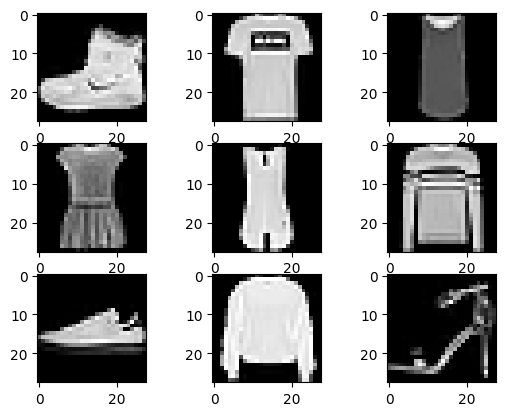

In [15]:
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Pre-Process data for the model

In [16]:
# scale pixels
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

# Define our model

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile and run Model

In [18]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7611 - loss: 0.6720 - val_accuracy: 0.8330 - val_loss: 0.4507
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8787 - loss: 0.3353 - val_accuracy: 0.8736 - val_loss: 0.3482
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9005 - loss: 0.2738 - val_accuracy: 0.8868 - val_loss: 0.3120
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9166 - loss: 0.2246 - val_accuracy: 0.8904 - val_loss: 0.3175
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9279 - loss: 0.1942 - val_accuracy: 0.8852 - val_loss: 0.3398
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9326 - loss: 0.1845 - val_accuracy: 0.8918 - val_loss: 0.3110
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9444 - loss: 0.1529 - val_accuracy: 0.8898 - val_loss: 0.3251
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9492 - loss: 0.1397 - val_accuracy: 0.

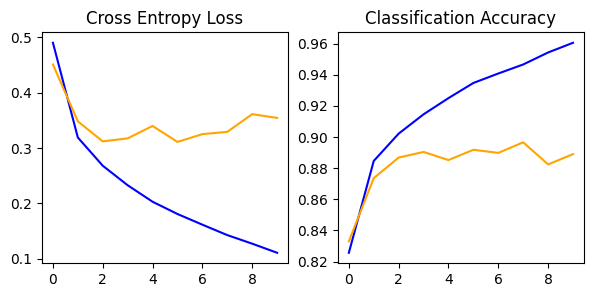

Accuracy: mean=88.900 std=0.000, n=1


In [19]:
# plot diagnostic learning curves
# plot loss
pyplot.figure(figsize=(7, 3))
pyplot.subplot(121)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(122)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(acc)*100, std(acc)*100, 1))


# Redefine model and re-run

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5927 - loss: 1.1224 - val_accuracy: 0.7976 - val_loss: 0.5278
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7811 - loss: 0.5805 - val_accuracy: 0.8470 - val_loss: 0.4395
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8101 - loss: 0.4975 - val_accuracy: 0.8470 - val_loss: 0.4300
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8320 - loss: 0.4455 - val_accuracy: 0.8634 - val_loss: 0.3796
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8405 - loss: 0.4257 - val_accuracy: 0.8698 - val_loss: 0.3712
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8495 - loss: 0.4051 - val_accuracy: 0.8670 - val_loss: 0.3641
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8527 - loss: 0.3908 - val_accuracy: 0.8782 - val_loss: 0.3474
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8610 - loss: 0.3688 - val_accur

# Display results again

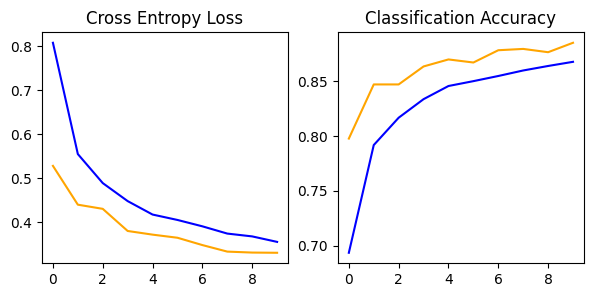

Accuracy: mean=88.500 std=0.000, n=1


In [21]:
# plot diagnostic learning curves
# plot loss
pyplot.figure(figsize=(7, 3))
pyplot.subplot(121)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(122)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(acc)*100, std(acc)*100, 1))

# Redefine model using batch normalization

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.6882 - loss: 1.0970 - val_accuracy: 0.8292 - val_loss: 0.6590
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8071 - loss: 0.6619 - val_accuracy: 0.8414 - val_loss: 0.5601
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8382 - loss: 0.5556 - val_accuracy: 0.8514 - val_loss: 0.5190
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8499 - loss: 0.4990 - val_accuracy: 0.8600 - val_loss: 0.4462
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8555 - loss: 0.4558 - val_accuracy: 0.8668 - val_loss: 0.4304
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8650 - loss: 0.4212 - val_accuracy: 0.8564 - val_loss: 0.4737
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8643 - loss: 0.4196 - val_accuracy: 0.8728 - val_loss: 0.4155
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8663 - loss: 0.4113 - 

# Display results again

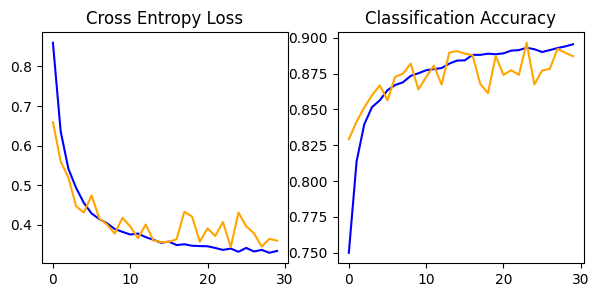

Accuracy: mean=88.720 std=0.000, n=1


In [30]:
# plot diagnostic learning curves
# plot loss
pyplot.figure(figsize=(7, 3))
pyplot.subplot(121)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(122)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(acc)*100, std(acc)*100, 1))